In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('fivethirtyeight')

# Yoyo despin design

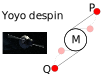

In [2]:

from IPython.core.display import SVG

SVG(filename='./yoyo-rocket.svg')

A rocket yoyo-despinning mechanism uses cords wrapped around the
payload. These cords unravel and slow the spinning of the rocket. In
this tutorial, you will consider the engineering system, conservation of
angular momentum, and conservation of energy. 

## Engineering system - kinematics

As the yoyo mass unravels, it moves further from the payload. The total
distance from the payload center of mass (COM) is described by 

$\mathbf{r}_{P/G} = R\hat{e}_R + l\hat{e}_{\theta}$

where $R$ is the payload radius, $l$ is the length of the cord, and
$\hat{e}_R$ and $\hat{e}_{\theta}$ are unit vectors in a cylindrical
coordinate system. The length of the cord depends upon the angle of the
payload, $\theta$. Consider a spool of thread rolling across the floor,
the thread left on the floor is equal to distance traveled or,
$R\theta$. Now, the position of yoyo P is

$\mathbf{r}_{P/G} = R\hat{e}_R + R\theta\hat{e}_{\theta}$

where $\theta$ is the change in angle of the payload after the yoyos are
released. The velocity of mass P is $\dot{\mathbf{r}}_{P/G}$, using the transport
equation

$\mathbf{v}_{P/G} = \frac{d}{dt}(R\hat{e}_R + R\theta\hat{e}_{\theta}) +
{}^I\mathbf{\omega}^C \times(R\hat{e}_R + R\theta\hat{e}_{\theta})$

where the total angular velocity is the combination of the payload's
angular velocity $\mathbf{\omega}_B$ and the angular velocity of the
yoyo relative to the payload, ${}^B \mathbf{\omega}^C=\dot{\theta}\hat{k}$. The addition of
payload and yoyo angular velocity is the total 

${}^I\mathbf{\omega}^C = \omega_B \hat{k} +
\dot{\theta}\hat{k}$

```{note}
Consider a 1-kg payload with radius $R=0.1~m$ and two yoyos of mass,
$m_P=m_Q=0.1~kg$. The system is released at $t = 0~s$ when the payload
is spinning at $\omega_B^0=10~rad/s$. 
```

In [3]:
# Set up the Python variables
M = 1
R = 0.1
I = M*R**2/2
m = 0.1
w0 = 10

The yoyos P and Q will remain anti-symmetric if released at the same time, so 

$\mathbf{r}_{P/G} = -\mathbf{r}_{Q/G},~|\mathbf{r}_{P/G}| =
|\mathbf{r}_{Q/G}|$ 

and

$\mathbf{v}_{P/G} = -\mathbf{v}_{Q/G},~v_P = v_Q.$

The equations for position and velocity are the essential kinematic
equations to define angular momentum and kinetic energy, the two kinetic
equations. 

## Engineering system - kinetics (conservation of angular momentum)

The angular momentum is constant because $\sum \mathbf{M}_G = 0 =
\frac{d}{dt}\mathbf{h}_G$. The total angular momentum is as such

$\mathbf{h}_G = I_G \omega_B \hat{k} + m_P \mathbf{r}_{P/G} \times
\mathbf{r}_{P/G}+
 m_Q \mathbf{r}_{Q/G} \times \mathbf{r}_{Q/G}$

where $m_P = m_Q = m$

$\mathbf{h}_G = I_G \omega_B \hat{k} + 2mR^2(\omega_B +
\theta^2(\omega_B+\dot{\theta})) = (I_G + 2mR^2)\omega_B^0$

where $\omega_B^0$ is the initial spinning rate of the payload,
$\omega_B$ is the angular speed of the payload after the yoyos are
released, $\theta$ is the angle of the yoyo cord, and $\dot{\theta}$ is
the relative angular velocity of the yoyo cord. At time $t=0$, the yoyos
are release and $\theta = \dot{\theta}=0$. There are three unknown
variables in this angular momentum equation, $\omega_B$, $\theta$, and
$\dot{\theta}$. You need another equation, use work-energy.

## Engineering system - kinetics (work-energy formulation)

There is no external work done to the system, the tension in the yoyo
cords are internal constraint forces, so the total work done is 0, e.g.
for a $T\Delta l$ there is an equal and opposite $-T\Delta l$ on
the other side. 

$T_1 + W_{1\rightarrow2} = T_2$

$\frac{1}{2}I_G (\omega_B^0)^2 + 2mR^2(\omega_B^0)^2 = 
\frac{1}{2}I_G (\omega_B)^2 +
m(R^2\theta^2(\omega_B+\dot{\theta})^2+R^2\omega_B^2)$

combining terms and simplifying

$\left(\frac{I_G}{2mR^2}+1\right)( (\omega_B^0)^2-\omega_B)  = 
\theta^2(\omega_B+\dot{\theta})^2$

## Combining equations and solving

Substitute $c = \left(\frac{I_G}{2mR^2}+1\right)$ so you are left with 

1. conservation of angular momentum

$c(\omega_B^0 - \omega_B) = \theta^2(\omega_B+\dot{\theta})$

2. work-energy

$c(\omega_B^0-\omega_B^2)(\omega_B^0+\omega_B^2) = \theta^2(\omega_B+\theta)^2$

dividing work-energy by conservation of angular momentum, 

$\frac{c(\omega_B^0-\omega_B^2)(\omega_B^0+\omega_B^2)}{c(\omega_B^0 - \omega_B)} = 
\frac{\theta^2(\omega_B+\theta)^2}{\theta^2(\omega_B+\theta)}$

with the solution for $\dot{\theta}$

$\omega_B^0 +\omega_B = \omega_B +\dot{\theta} \rightarrow \omega_B^0 =
\dot{\theta}$.

In [4]:
t = np.linspace(0,1)
theta = w0*t 

This result, _combining conservation of angular momentum and
work-energy_, tells you that the angular velocity of the yoyos will be
be equal to the initial angular velocity of the payload. The angle
$\theta$ will
continue increase as $\omega_B^0 t$ until released. Plug this result into
the orginal conservation of angular momentum equation to solve for
$\omega_B$

$c(\omega_B^0 - \omega_B) = (\omega_B^0 t)^2(\omega_B+\omega_B^0)$

$\omega_B(t) = \frac{c-(\omega_B^0 t)^2}{c+(\omega_B^0 t)^2}\omega_B^0.$

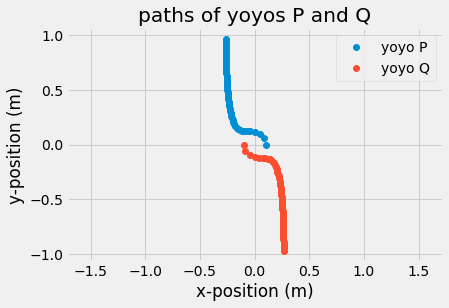

In [5]:
c = np.sqrt(I/2/m/R**2 + 1)
wB = lambda t: (c-w0**2*t**2)/(c+w0**2*t**2)*w0
wC = wB(t) + w0
x = R*np.cos(wC*t) - R*w0*t*np.sin(wC*t)
y = R*np.sin(wC*t) + R*w0*t*np.cos(wC*t)
plt.plot(x,y, 'o', label = 'yoyo P')
plt.plot(-x,-y, 'o', label = 'yoyo Q')
plt.axis('equal')
plt.title('paths of yoyos P and Q')
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.legend();

The added benefit of using cords to release the yoyos is that the
payload angular velocity can be reduced to 0 rad/s at time, $t_f$. 

$\omega_B(t_f) = 0 = c - (\omega_B^0t)^2 \rightarrow t_f =
\frac{\sqrt{c}}{\omega_B^0} =
\frac{1}{\omega_B^0}\sqrt{\frac{I}{2mR^2}+1}.$

The final cord length, is unraveling distance, $l_F = R\theta  =
R\omega_B^0 t_f$

$l_F = \sqrt{\frac{I}{2m}+R^2}$

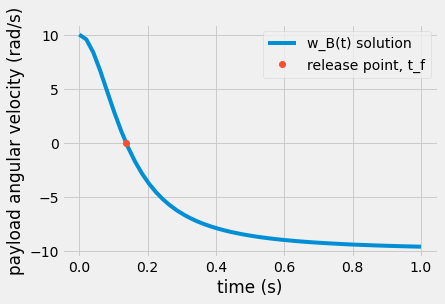

In [6]:
tf = np.sqrt(c)/w0
lf = R*np.sqrt(c)
plt.plot(t,wB(t),label = 'w_B(t) solution')
plt.plot(tf,wB(tf),'o', label = 'release point, t_f')
plt.legend();
plt.xlabel('time (s)')
plt.ylabel('payload angular velocity (rad/s)');